In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, time

In [2]:
import xgboost as xgb

In [3]:
from evaluate_model import eval_pred, compute_error, error_prediction

In [6]:
data_folder = "../../data/final_data"

In [27]:
data_convention = pd.read_csv(
    os.path.join(data_folder, 'final_convention.csv'),
    sep=";", index_col=0)
data_champs = pd.read_csv(
    os.path.join(data_folder, 'final_champs.csv'),
    sep=";", index_col=0)
data_peres = pd.read_csv(
    os.path.join(data_folder, 'final_peres.csv'),
    sep=";", index_col=0)
data_convention.head()

,Débit horaire,Taux d'occupation,datetime,year,month,day,hour,dayofweek,Date,C1_School closing,...,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,StringencyLegacyIndexForDisplay,ContainmentHealthIndexForDisplay,nom_jour_ferie,jour_ferie,nom_vacance_scolaire,vacance_scolaire
0,323.0,1.67722,2019-11-01 03:00:00+00:00,2019,11,1,3,4,2019-11-01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,1,3,0
1,272.0,1.41056,2019-11-01 04:00:00+00:00,2019,11,1,4,4,2019-11-01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,1,3,0
2,240.0,1.35667,2019-11-01 05:00:00+00:00,2019,11,1,5,4,2019-11-01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,1,3,0
3,216.0,1.14056,2019-11-01 06:00:00+00:00,2019,11,1,6,4,2019-11-01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,1,3,0
4,260.0,1.85722,2019-11-01 07:00:00+00:00,2019,11,1,7,4,2019-11-01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,1,3,0


In [21]:
pred_convention_debit, pred_convention_occupation = eval_pred(data_convention, xgb.XGBRegressor())

100%|██████████| 30/30 [00:24<00:00,  1.21it/s]


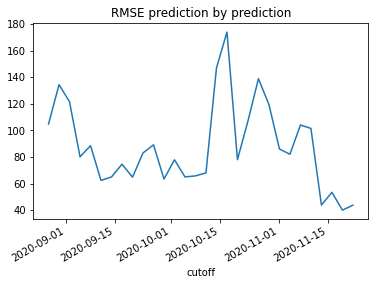

87.61609076237995

In [22]:
error_convention_debit = error_prediction(pred_convention_debit)
error_convention_debit.mean()

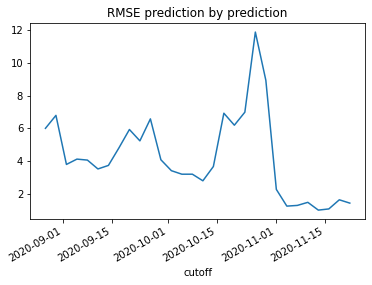

4.235410472931489

In [23]:
error_convention_occupation = error_prediction(pred_convention_occupation)
error_convention_occupation.mean()

In [24]:
pred_convention_debit, pred_convention_occupation = eval_pred(data_convention.drop(columns=["nom_jour_ferie", "jour_ferie", "nom_vacance_scolaire", "vacance_scolaire"]), xgb.XGBRegressor())

100%|██████████| 30/30 [00:39<00:00,  1.30s/it]


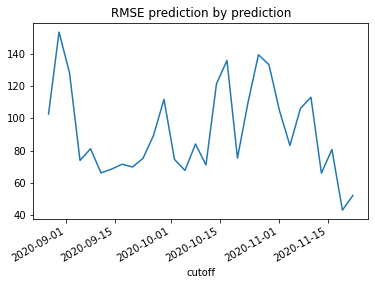

91.82876804691936

In [25]:
error_convention_debit = error_prediction(pred_convention_debit)
error_convention_debit.mean()

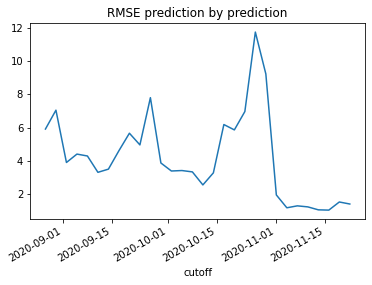

4.194204884614532

In [26]:
error_convention_occupation = error_prediction(pred_convention_occupation)
error_convention_occupation.mean()

In [41]:
def add_one_week_ago(data, target = "Débit horaire"):
    shift_list = [144+i for i in range(144)]
    temp = data.copy()
    for shift in shift_list:
        temp[f"{target}_shift_{shift}"] = temp[target].shift(shift, fill_value=temp[target].mean())
    return temp

In [42]:
data_convention_ago = add_one_week_ago(data_convention)
data_convention_ago.head()

,Débit horaire,Taux d'occupation,datetime,year,month,day,hour,dayofweek,Date,C1_School closing,...,Débit horaire_shift_278,Débit horaire_shift_279,Débit horaire_shift_280,Débit horaire_shift_281,Débit horaire_shift_282,Débit horaire_shift_283,Débit horaire_shift_284,Débit horaire_shift_285,Débit horaire_shift_286,Débit horaire_shift_287
0,323.0,1.67722,2019-11-01 03:00:00+00:00,2019,11,1,3,4,2019-11-01,0.0,...,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223
1,272.0,1.41056,2019-11-01 04:00:00+00:00,2019,11,1,4,4,2019-11-01,0.0,...,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223
2,240.0,1.35667,2019-11-01 05:00:00+00:00,2019,11,1,5,4,2019-11-01,0.0,...,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223
3,216.0,1.14056,2019-11-01 06:00:00+00:00,2019,11,1,6,4,2019-11-01,0.0,...,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223
4,260.0,1.85722,2019-11-01 07:00:00+00:00,2019,11,1,7,4,2019-11-01,0.0,...,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223,530.766223


In [43]:
pred_convention_debit, pred_convention_occupation = eval_pred(data_convention_ago, xgb.XGBRegressor())

100%|██████████| 30/30 [03:01<00:00,  6.04s/it]


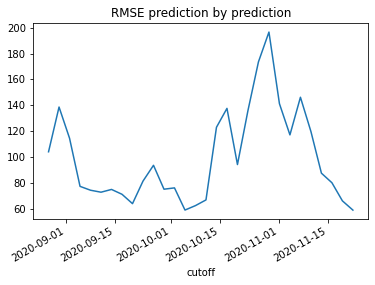

99.37694204816563

In [44]:
error_convention_debit = error_prediction(pred_convention_debit)
error_convention_debit.mean()

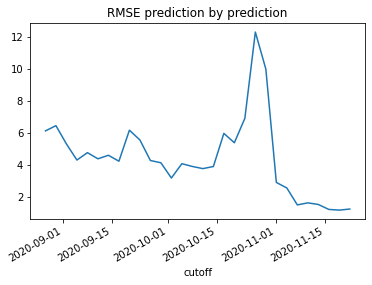

4.434118983623056

In [45]:
error_convention_occupation = error_prediction(pred_convention_occupation)
error_convention_occupation.mean()